## Week 6 
Task1 - Implement the CNN shown in the example above using Keras functions for implementing the training steps.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
print ('x_train samples = ' + str(x_train.shape))
print ('y_train samples = ' + str(y_train.shape)) #labels

print ('x_test samples = ' + str(x_test.shape))
print ('y_test samples = ' + str(y_test.shape))

x_train samples = (50000, 32, 32, 3)
y_train samples = (50000, 1)
x_test samples = (10000, 32, 32, 3)
y_test samples = (10000, 1)


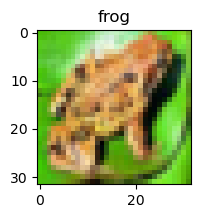

In [4]:
i =3500
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title(labels[int(label)])
plt.imshow(image)
plt.show()

Normalize the inputs and reshape the labels

In [6]:
numtrain = 40000
y_input = tf.keras.utils.to_categorical(y_train[:numtrain])
x_input = (x_train[:numtrain] / 255.0)
y_valid = tf.keras.utils.to_categorical(y_train[numtrain:])
x_valid = (x_train[numtrain:] / 255.0)

In [7]:
#Sequential model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                 activation=tf.nn.relu, padding='same',
                                 input_shape=( 32, 32, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu)) #512 here was too many, could not be run

# Add a softmax layer with 10 output units:
model.add(tf.keras.layers.Dense(10, activation='softmax'))


2023-06-19 19:22:11.027671: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 19:22:11.758112: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14626 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [8]:
#Compile model

# we can set validation data to be our test dataset so that we can observe the accuracy on the test data during training. 
# In this case we’re also going to use a callback to stop the training when the validation loss stops improving.

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(x_input, y_input, epochs=100, verbose=0,
        batch_size=256,
        callbacks=callbacks,
        validation_data=(x_valid, y_valid))

2023-06-19 19:22:23.716832: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


In [9]:
predictions = model.predict(x_test/255.0,verbose=0)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

test accuracy:  0.5648


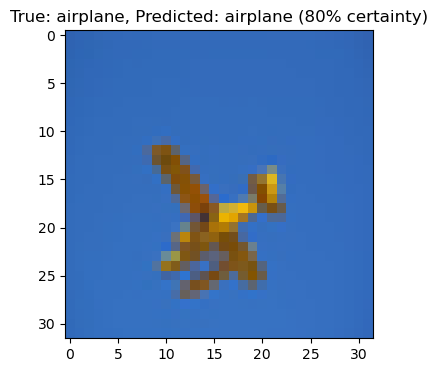

In [10]:
#We can also look at the predictions for a specific image:
i=2200
label = y_test[i]
image = x_test[i]
plt.figure(figsize=(4,4))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' %
            (labels[int(label)],labels[y_pred[i]],
            100*predictions[i,y_pred[i]]))
plt.imshow(image)
plt.show()

## A deeper convolutional neural network

In [11]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
activation=tf.nn.relu,padding='same',
input_shape=( 32, 32, 3)))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),
activation=tf.nn.relu,padding='same'))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
activation=tf.nn.relu,padding='same'))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [12]:
fit = model2.fit(x_input, y_input, epochs=100,verbose=0,
        batch_size=256,
        callbacks=callbacks,
        validation_data=(x_valid, y_valid))

predictions2 = model2.predict(x_test/255.0,verbose=0)

y_pred = np.argmax(predictions2,axis=-1)

print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

test accuracy:  0.717


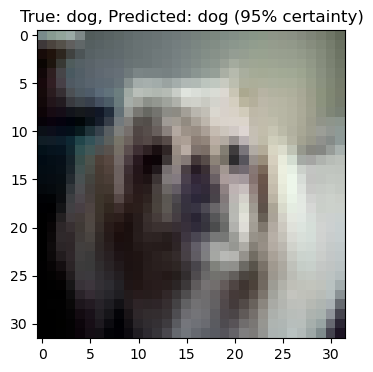

In [13]:
i=2201
label = y_test[i]
image = x_test[i]
plt.figure(figsize=(4,4))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' %
            (labels[int(label)],labels[y_pred[i]],
            100*predictions2[i,y_pred[i]]))
plt.imshow(image)
plt.show()